In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,20)

In [2]:
from google.colab import files


uploaded = files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [53]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Bengaluru_House_Data.csv']))
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [54]:
df.shape

(13320, 9)

In [55]:
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [56]:
df1=df.drop(['area_type','society','availability','balcony'], axis= 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [57]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [58]:
df2=df.dropna()
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [59]:
df2.shape

(7496, 9)

In [60]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [61]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-61-4b3156990b73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [62]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [63]:
df2[df2.bhk>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000,9.0,3.0,360.0,11


In [64]:
df2.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [65]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [66]:
df2[~df2['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,Bhath N,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [67]:
def convert_sqft_to_num(x):
  tokens= x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float (tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [68]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [69]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [70]:
df4=df3.copy()
df4['price_per_sqft']=(df3['price']*100000)/df3['total_sqft']
df4.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [71]:
len(df4.location.unique())    #DIMENSIONALITY CURSE

634

In [72]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                        398
Sarjapur  Road                    310
Electronic City                   238
Kanakpura Road                    216
Thanisandra                       215
                                 ... 
Kattigenahalli                      1
Kashi Nagar                         1
Kamakshipalya                       1
Kalhalli                            1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 626, dtype: int64

In [73]:
len(location_stats[location_stats<10])

472

In [74]:
location_less_10=location_stats[location_stats<10]
location_less_10

location
Sompura                           9
Devarachikkanahalli               9
R.T. Nagar                        9
Kalkere                           9
Basapura                          9
                                 ..
Kattigenahalli                    1
Kashi Nagar                       1
Kamakshipalya                     1
Kalhalli                          1
Yeshwanthpur Industrial Suburb    1
Name: location, Length: 472, dtype: int64

In [75]:
len(df4.location.unique())

626

In [76]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_less_10 else x)
len(df4.location.unique())

155

In [77]:
df4[df4.total_sqft/df4.bhk<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
349,Plot Area,18-Dec,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,Ready To Move,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,Ready To Move,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [78]:
df4.shape

(7496, 11)

In [79]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(7454, 11)

In [80]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df6=remove_pps_outliers(df5)
df6.shape

(5844, 11)

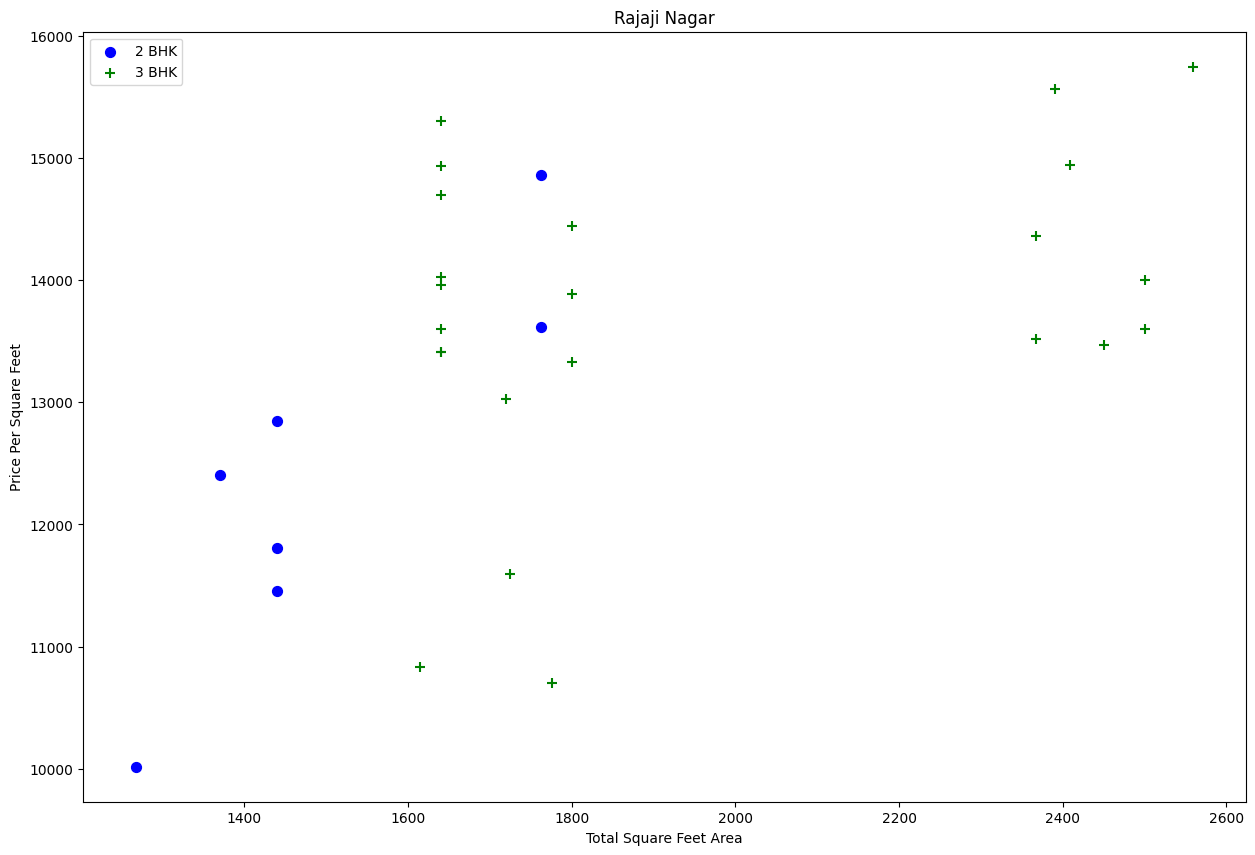

In [81]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft,color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df6, "Rajaji Nagar")

In [82]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'] + stats['std'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(3032, 11)

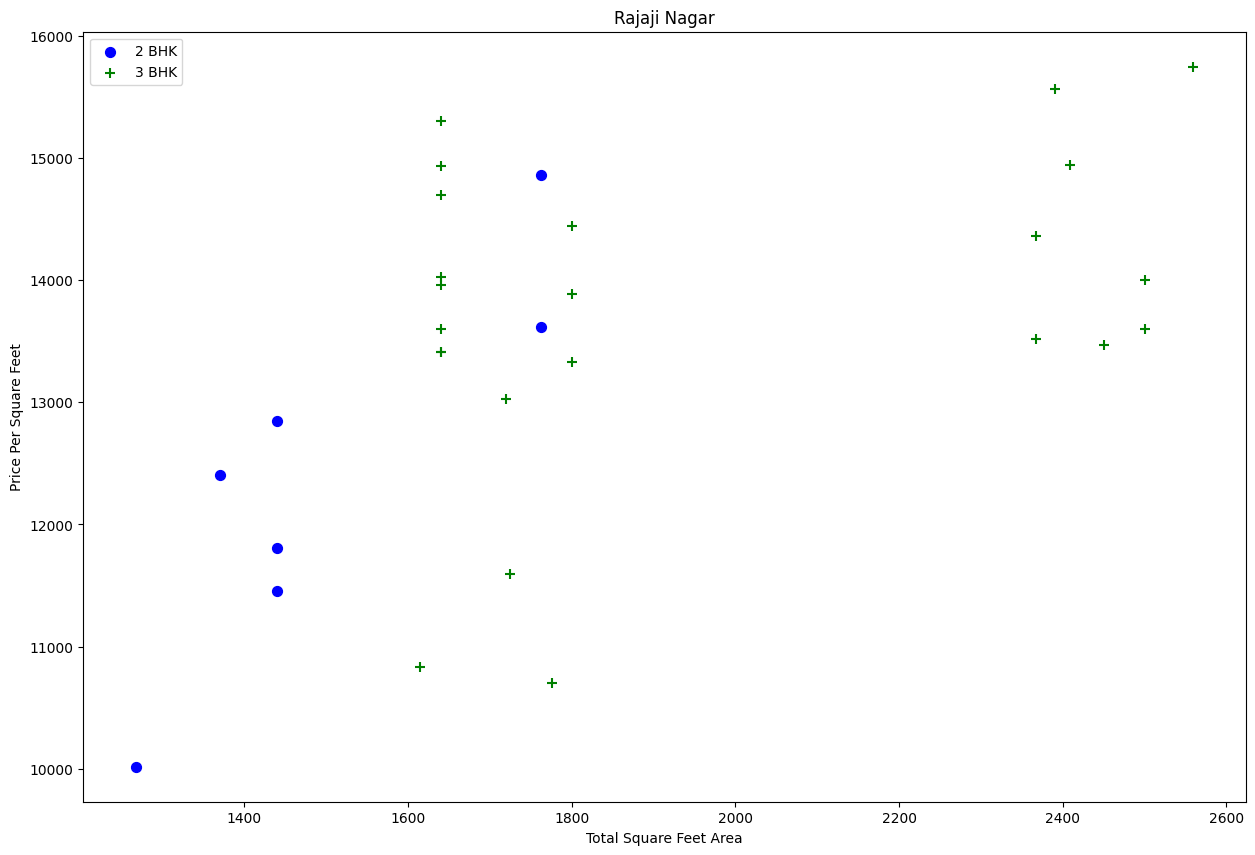

In [83]:
plot_scatter_chart(df6, "Rajaji Nagar")

In [84]:
df7.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [85]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(2997, 11)

In [86]:
df9=df8.drop(["size","price_per_sqft"],axis='columns')
df9.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2
3,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2
4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1590.0,3.0,3.0,131.0,3


In [87]:
dummies=pd.get_dummies(df9.location,dtype='int')
dummies.head(3)


,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(5)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1590.0,3.0,3.0,131.0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df11=df10.drop('location',axis='columns')
df12=df11.drop('area_type',axis='columns')
df13=df12.drop('society',axis='columns')

df14=df13.drop('availability',axis='columns')
df15=df14.drop('balcony',axis='columns')



df15.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df15.shape

(2997, 158)

In [91]:
#for our model building dropping dependent variable and storing it in another variable

X=df15.drop('price',axis='columns')

X.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y=df15.price
y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [103]:
#train-test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [104]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9409952477740332

In [105]:
#cross-validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.94717311, 0.93632313, 0.94669056, 0.94111089, 0.93636753])

In [106]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.941533,{'fit_intercept': True}
1,lasso,0.820500,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.886596,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [107]:
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns==location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]

predict_price('1st Phase JP Nagar', 1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.345198779307

In [108]:
predict_price('Indira Nagar', 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.97963867814272

In [109]:
predict_price('Indira Nagar', 1000, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.01072540116816

In [110]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [111]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))